## Hypothesis Testing

In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from js import fetch
import io

In [3]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
resp = await fetch(URL)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())
ratings_df = pd.read_csv(ratings_url)

### T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?

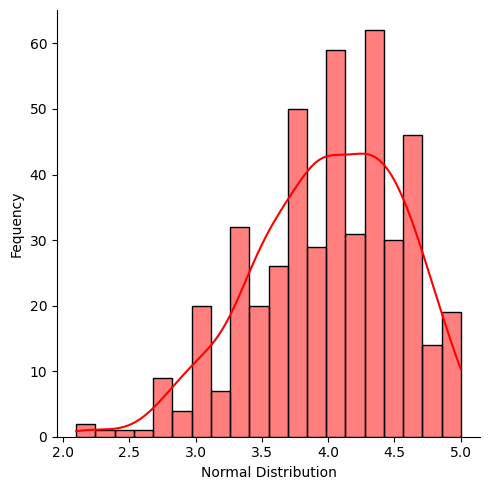

In [6]:
plot1 = sns.displot(ratings_df['eval'], bins=20, kde=True, color='red')

plot1.set(xlabel='Normal Distribution', ylabel='Fequency')

In [7]:
# Using Levene's test in python to check test significance
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

In [8]:
# T-test
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var=True)

TtestResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217, df=461.0)

P-value is less than the alpha value of 0.05, thus the null hypothesis is rejected and there is a statistical difference in teaching evaluations based on gender

#### ANOVA:Using the teachers' rating data set, does beauty score for instructions differe by age?

In [9]:
# Create age group ranges
ratings_df.loc[(ratings_df['age'] <=40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >=57), 'age_group'] = '57 years and older'

#### Hypothesis: 
#### H_0: the three population means are equal
#### H_1: At least one mean differs

In [10]:
#Test for equality varience

scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'],
                   center='mean')

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

In [11]:
#Separate the sample sets into variables
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']

In [12]:
#Run a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08


### Chi-square
#### Hypothesis :
#### H_0: The proportion of teachers who are tenured is independent of gender
#### H_1: The proportion of teachers who are tenured is associated with gender

In [13]:
#Create a Cross-tab table
cont_table = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [14]:
# Use scipy.stats to return X2 value, p-value, degree of freedom, and expected values.
scipy.stats.chi2_contingency(cont_table, correction = False)

Chi2ContingencyResult(statistic=2.557051129789522, pvalue=0.10980322511302845, dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))

### Correlation: Using the teachers rating dataset, Is teaching evaluation score correlated with beauty score?
#### Hypothesis:
#### H_0: Teaching evaluation score is not correlated with beauty score
#### H_1: Teaching evaluation score is correlated with beauty score

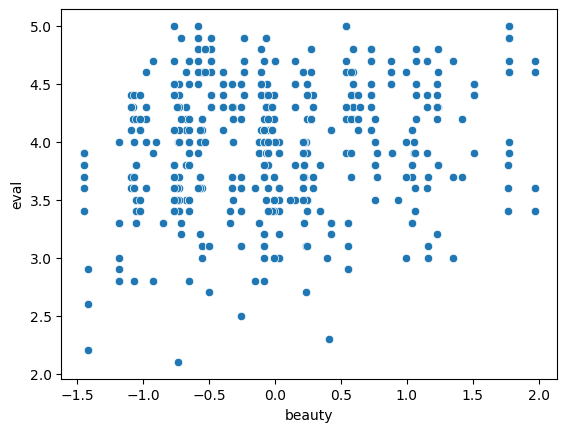

In [15]:
#Use pearson correlation test and draw a scatter plot
s_plot = sns.scatterplot(x='beauty', y='eval', data=ratings_df)

In [16]:
scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

PearsonRResult(statistic=0.18903909084045223, pvalue=4.247115419813475e-05)

In [20]:
# Using the teacher rating data set, does tenure affect teaching evaluation score?
scipy.stats.ttest_ind(ratings_df[ratings_df['tenure'] == 'yes']['eval'],
                      ratings_df[ratings_df['tenure'] == 'no']['eval'], 
                      equal_var=True)

TtestResult(statistic=-2.8046798258451777, pvalue=0.005249471210198792, df=461.0)

In [23]:
# Is there and association between age and tenure?
cont_table2  = pd.crosstab(ratings_df['tenure'], ratings_df['age_group'])
scipy.stats.chi2_contingency(cont_table2)

Chi2ContingencyResult(statistic=8.749576239010711, pvalue=0.012590809706820843, dof=2, expected_freq=array([[ 24.89416847,  26.87688985,  50.22894168],
       [ 88.10583153,  95.12311015, 177.77105832]]))

### Test for equality of variance for beauty scores between tenured and non-tenured instructors

In [25]:
scipy.stats.levene(ratings_df[ratings_df['tenure'] == 'yes']['beauty'],
                      ratings_df[ratings_df['tenure'] == 'no']['beauty'], 
                      center='mean')

LeveneResult(statistic=0.4884241652750426, pvalue=0.4849835158609811)

### Is there an association between visible minorities and tenure?

In [27]:
cont_table3  = pd.crosstab(ratings_df['vismin'], ratings_df['tenure'])
scipy.stats.chi2_contingency(cont_table3, correction = True)

Chi2ContingencyResult(statistic=1.3675127484429763, pvalue=0.24223968800237178, dof=1, expected_freq=array([[ 87.90064795, 311.09935205],
       [ 14.09935205,  49.90064795]]))